In [4]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import matplotlib.dates as mdates
import datetime
import matplotlib
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

In [5]:
# Load log files
measurements_log = ['Raw', 'Fix']

log = LogReader(manufacturer="OnePlus", device="S3", acronym='GP7', specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/raw/log_GooglePixel7_20230811141817_modified.txt")

log = LogReader(manufacturer="Samsung", device="S4", acronym='GP7', specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S4_dynamic_lake/raw/log_GooglePixel7_20230811150244_modified.txt")

FileNotFoundError: [Errno 2] No such file or directory: '../.data/2023_Dataset_Hervanta/S4_dynamic_lake/raw/log_GooglePixel7_20230811150244_modified.txt'

In [6]:
def plotMap(locations, extent, scale, marker='', markersize=1):
    """
    Taken from: https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy
    Mapping New York City Open Street Map (OSM) with Cartopy
    This code uses a spoofing algorithm to avoid bounceback from OSM servers
    
    """

    matplotlib.rcParams.update({'font.size': 10})

    def image_spoof(self, tile): # this function pretends not to be a Python script
        url = self._image_url(tile) # get the url of the street map API
        req = Request(url) # start request
        req.add_header('User-agent','Anaconda 3') # add user agent to request
        fh = urlopen(req) 
        im_data = io.BytesIO(fh.read()) # get image
        fh.close() # close url
        img = Image.open(im_data) # open image with PIL
        img = img.convert(self.desired_tile_form) # set image format
        return img, self.tileextent(tile), 'lower' # reformat for cartopy

    cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
    osm_img = cimgt.OSM() # spoofed, downloaded street map

    fig = plt.figure(figsize=(6,6)) # open matplotlib figure
    ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
    ax1.set_extent(extent) # set extents

    ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

    # Polylines
    for label, loc in locations.items():
        ax1.plot(loc['longitude'].to_list(), loc['latitude'].to_list(),
                 linewidth=2, marker=marker, markersize=markersize, color='tab:red',
                 transform=ccrs.Geodetic(), label=label)
    
    # Grid
    # gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    # gl.top_labels = False
    # gl.right_labels = False

    ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
    ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
    lon_formatter = LongitudeFormatter(number_format='0.4f',degree_symbol='',dateline_direction_label=True) # format lons
    lat_formatter = LatitudeFormatter(number_format='0.4f',degree_symbol='') # format lats
    ax1.xaxis.set_major_formatter(lon_formatter) # set lons
    ax1.yaxis.set_major_formatter(lat_formatter) # set lats
    # ax1.xaxis.set_tick_params(labelsize=14)
    # ax1.yaxis.set_tick_params(labelsize=14)

    plt.legend()
    plt.grid(False)

    matplotlib.rcParams.update({'font.size': 12})

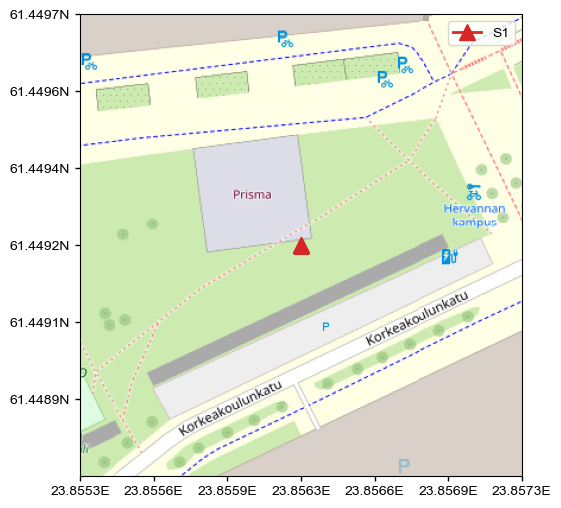

In [7]:
ref_enu = [61.44922404, 23.8562781, 162.711]
center = ref_enu[:2]
extent = [center[1] - 0.001, center[1] + 0.001, center[0] - 0.0005, center[0] + 0.0005]

locations = {}
locations['S1'] = pd.DataFrame.from_dict({'latitude':[ref_enu[0], ref_enu[0]+1e-6], 'longitude':[ref_enu[1], ref_enu[1]+1e-6]})
plotMap(locations=locations, extent=extent, scale=18, marker='^', markersize=12)

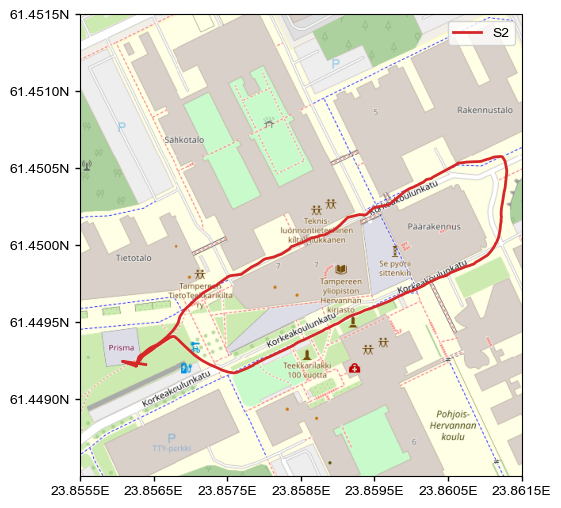

In [9]:
log = LogReader(manufacturer="", device="S2", acronym='GP7', specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixel7_20230801110405_modified.txt")

ref_enu = [61.44922404, 23.8562781, 162.711]
center = [61.45, 23.8585]
extent = [center[1] - 0.003, center[1] + 0.003, center[0] - 0.0015, center[0] + 0.0015]

locations = {}
locations['S2'] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
plotMap(locations=locations, extent=extent, scale=17)

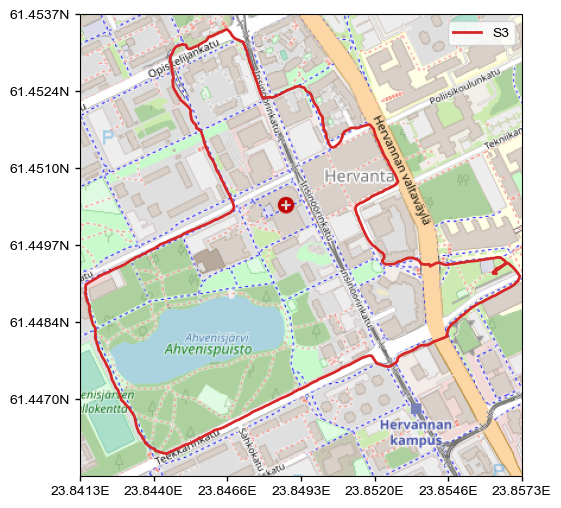

In [11]:
log = LogReader(manufacturer="", device="S2", acronym='GP7', specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/raw/log_GooglePixel7_20230811141817_modified.txt")

ref_enu = [61.44922404, 23.8562781, 162.711]
center = [61.4497, 23.8493]
extent = [center[1] - 0.008, center[1] + 0.008, center[0] - 0.004, center[0] + 0.004]

locations = {}
locations['S3'] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
plotMap(locations=locations, extent=extent, scale=15)

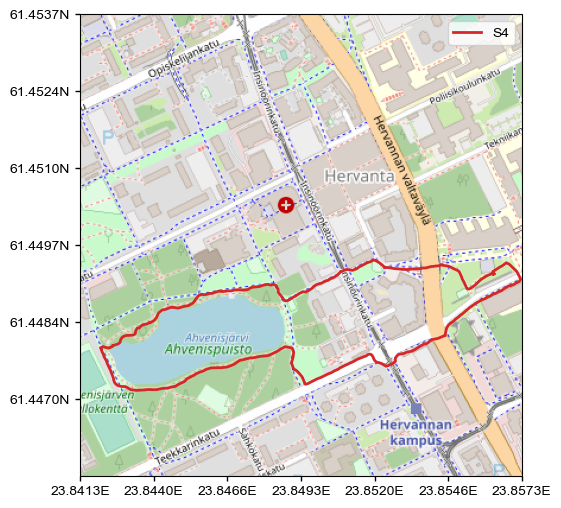

In [14]:
log = LogReader(manufacturer="", device="S2", acronym='GP7', specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S4_dynamic_lake/raw/log_GooglePixel7_20230811150244_modified.txt")

ref_enu = [61.44922404, 23.8562781, 162.711]
center = [61.4497, 23.8493]
extent = [center[1] - 0.008, center[1] + 0.008, center[0] - 0.004, center[0] + 0.004]

locations = {}
locations['S4'] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
plotMap(locations=locations, extent=extent, scale=15)